# Business Understanding

Linear Regression
* Fast
* Easily interpretable feature effect
* Easily evaluated
* Easily explained to non-technical
* Easily visualized

#### Assumptions of Linear Regression
* Linear relationship
* Normality
* Little to no multi-collinearity
* Evenly distributed(heteroskedastic) residuals.
* Non-autocorrelating residuals

# Data Understanding

* Data Types
    * Ints, Floats, Strings, Booleans
    * Numerical vs categorical?
* Missing data?
* Distribution
    * Range
    * Skew
* Correlation
* Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

## Look at the data!

Bread and butter of first examinations: head(), info(), describe(),

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Taking a look at the column names, it is imperative to have an explanation of what the data in the column describes.  
For public dataset a quick search(google 'kc housing data metadata') will often find what is needed.  
If it is not public, ask up the chain where the data came from.  
On kaggle, there is a version of this dataset with a description of the columns: https://www.kaggle.com/harlfoxem/housesalesprediction.

Examine the 'info' about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Things to take note of:
* 21 Total columns
* Total number of rows: 21597
    * Waterfront, view, and yr_renovated have less entries(nulls are present)
* Mix of integer(int64), floating point(float64) and string(object) data types present
* The 'date' and 'sqft_basement' columns are strings - these should be converted.
* yr_built and yr_renovated have been input as float and int but should probably be datetime objects

Examine the number of rows in each column that are missing data.  

In [6]:
df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The below calculates the percentage of missing values in each column.

In [7]:
round(df.isna().sum() / len(df), 4) * 100

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

__NOTE ON NON_NULL MISSING DATA__  
Technically there may still be missing data. Sometimes there is non-valid data entered as something like an empty string(' ') or irrelevant numbers(-999).  
More on this in a bit.

Use describe to take a quick look at distributions. (Can be a good way to spot '-999s')

In [8]:
df.describe().T     # Only describes numeric datatypes (missing date and sqft_basement), will look at non-numeric datatypes below

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


__Ultimately vizualizing the data with histograms will give us a more easy to read glimpse at distribution but this can be a great first look.__

What about not numeric data?

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df.select_dtypes('O')     # Viewing columns of a DataFrame where the values are strings - 'O' short for 'object'

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


Both of these ultimately shouldn't be string. They should be datetime and float types.  
This can be changed quickly using the method below. However for the sake of data flow from raw data to model, it will be added to a pipeline later.

Converting to datetime:

In [11]:
pd.to_datetime(df.date)

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

Converting to float:

In [12]:
# df.sqft_basement = df.sqft_basement.astype('float')

The above will throw an error for the '?' value in sqft_basement.  
This is an example of the NON_NULL missing data mentioned above.  
We will want to remove or fill these cells, depending on how many there are.

Two methods for discovering problematic datapoints.

In [13]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
861.0         1
266.0         1
508.0         1
176.0         1
1852.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [14]:
df['sqft_basement'].unique()     # This may be messy for large datasets.

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [15]:
sum(df.sqft_basement == '?')/len(df) * 100

2.1021438162707784

2.1% of the __sqft_basement__ is missing.
And from before  
11.0% of __waterfront__ is missing  
0.29% of __view__ is missing  
17.79% of __yr_renovated__ is missing

## Missing Data

Missing data needs to be filled or dropped.

Dropping values comes in two forms
* Dropping a column
    * Dropping an entire column from the DataFrame (Losing columns, not losing any rows)
    * Gut instincts - when there is a lot of missing values 
* Dropping rows 
    * Dropping an entire rows where there is a missing value in the row and column (Losing rows, not losing any columns)
    * Gut instinct - when there are few missing values in a column

! Note: Depending on the business understanding in your domain, it may be acceptable to drop a column on the grounds that it is not predictive of your target. 

If few rows are missing, dropping is rarely the best step. If the column contains impactful data, then the rows should be filled (*imputed*). Note that this explanation is in the context of machine learning models, __*not*__ hypothesis testing or making stastical claims.

Nan's are most commonly filled with the mean or the median depending on the distribution. Another option is to bin the data and create categorical features based on the bins and leave the nans in a bin of their own.

To Summarize, common options are:
* Impute the mean (numerical)
* Impute the median (numerical)
* Fill with the most common(categorical)
* Bin and include missing category
* Remove

* Double check you can't engineer the feature from other columns(though be way this is likely a sign of collinearity)
    * eg. sqft_basement can be deduced with the difference between sqft_living and sqft_above

Discussion: To drop or not?  

__sqft_basement__: Dropping 2.1% of rows wouldn't be a huge loss. In this case, we can engineer the feature where missing.  
__waterfront__: Dropping 11% is a rather significant loss of information and is rarely the best option. It should be filled.  
__view__: Dropping 0.3% of data will not lose a lot of information and therefore dropping is a viable option for __view__  
__yr_renovated__: Dropping 17.79% is very significant. For tutorial purposes, this column will be binned with nans included. Though it could also be an opportunity to deduce yr_built if no yr_renovated.

Final check for data quaility: Checking for duplicated entries!

In [16]:
df.duplicated().sum()

0

* ~~Data Types~~
* ~~Missing data?~~
* Distribution
    * Range
    * Skew
* Correlation
* Visualization

### Lets take a look at the distributions!
Make a copy of the df to visualize in case dtypes need to be changed

In [17]:
df_viz = df.copy()

Examine distributions with histograms. First lets look at the target.

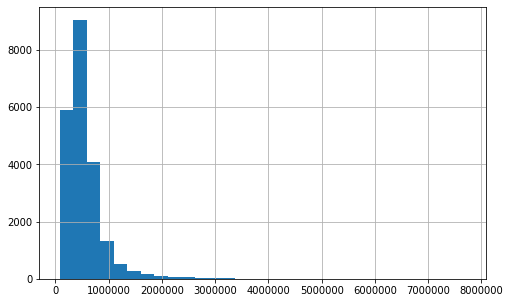

In [18]:
df_viz['price'].hist(figsize=(8,5), bins=30);

This is far from a normal distribution. Perhaps a computation of the price will be better? The data is left skewed so maybe a __square root__ or __log__ of the price is a good place to look.

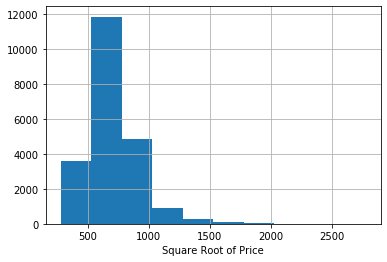

In [19]:
(df_viz.price**0.5).hist()
plt.xlabel('Square Root of Price');

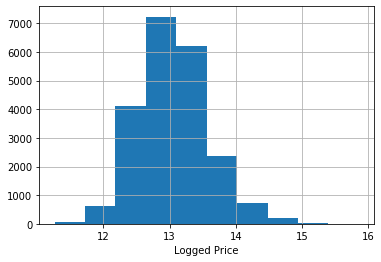

In [20]:
np.log(df_viz.price).hist()
plt.xlabel('Logged Price');

That seems to capture the distribution in a normal distribution. Let's add a logged_price feature.

In [38]:
df_viz.loc[:,'log_price'] = np.log(df.price)
targets = ['price', 'log_price']

What about predictors? Time to coerce our object dtypes.

In [22]:
df_viz.date = pd.to_datetime(df_viz.date)

Recall that our string '?'s can't be converted to numeric.
For vizualization purposes lets calculate the missing values from the other features.  
 \* __sqft_living__ and __sqft_above__ are floats and CAN be subtracted.

In [23]:
df_viz.loc[df['sqft_basement']=='?','sqft_basement'] = df_viz.sqft_living - df_viz.sqft_above

In [24]:
df_viz.sqft_basement = df_viz.sqft_basement.astype('float')

Quick check that the relationship is correct. 

In [25]:
sum(df_viz.sqft_above + df_viz.sqft_basement != df_viz.sqft_living)

0

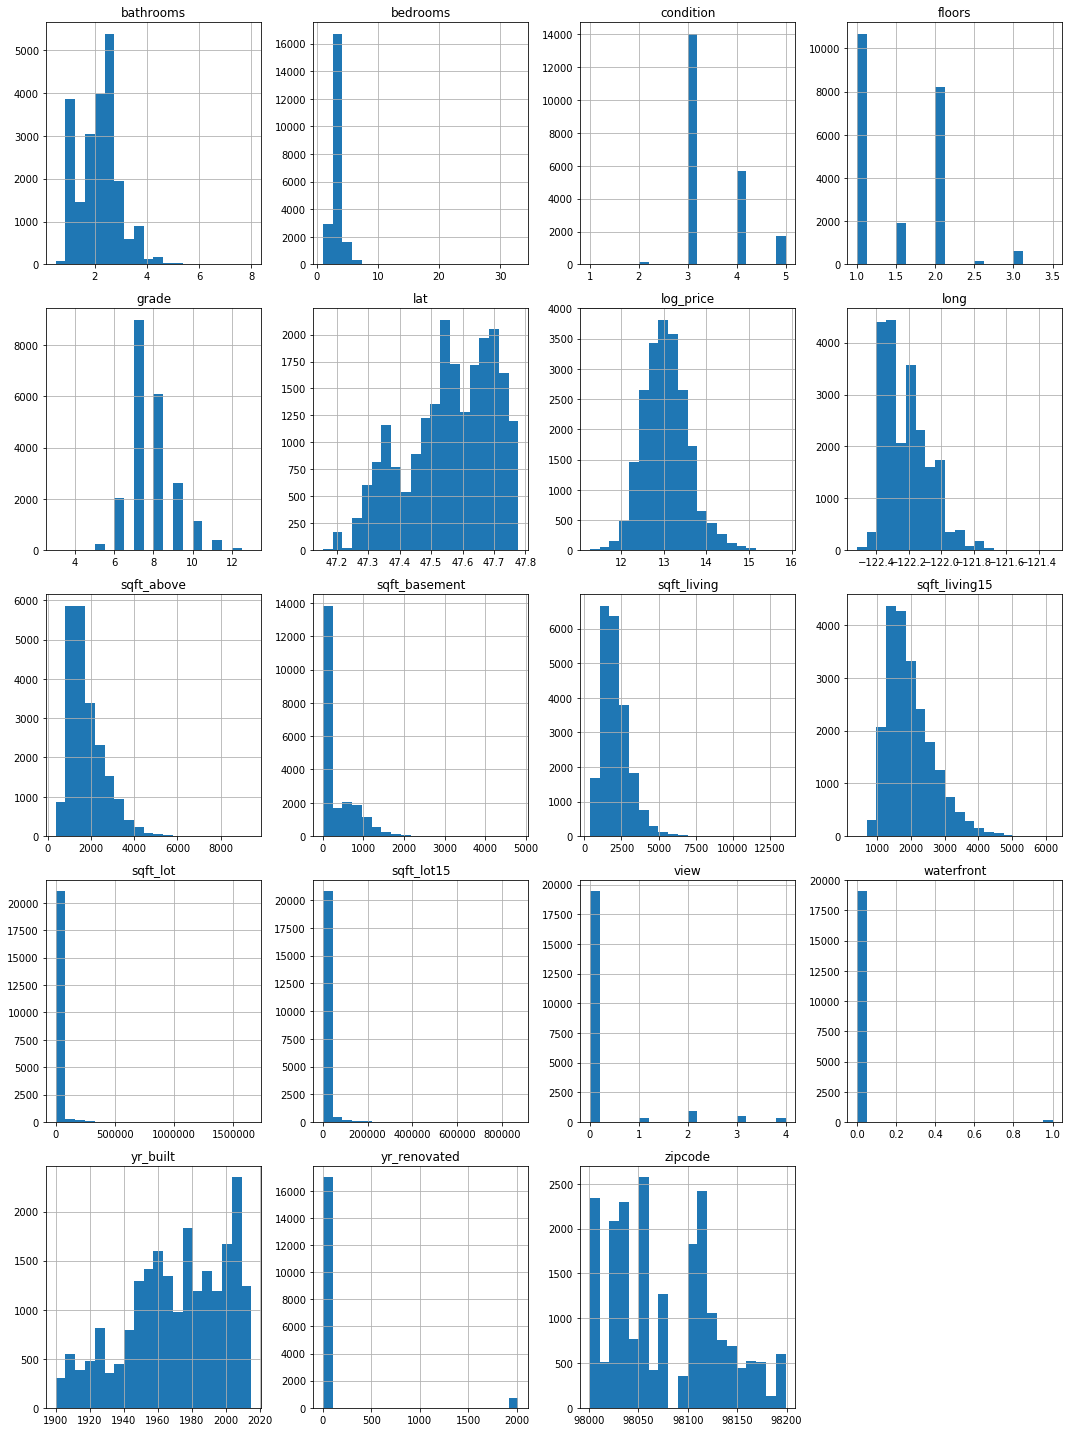

In [26]:
df_viz.drop(['id', 'price'], axis=1).hist(figsize=(15,20), bins=20)
plt.tight_layout()

Well, there's not a lot of pretty bell curves in our data. It's not problematic for categorical data such as the boolean(waterfront or not). But what about the the numerical features? Maybel logging also them would be helpful.

BUT FIRST! 2 Things:
* The date column is missing
    * The datetime can be visualized differently below
* The yr_renovated column has a lot of 0's. 
    * This is missing data. Since this column was going to be binned with missing in this tutorial, there's no need to adjust the policy. But in general this sort of discovery could mean re-evaluting the handling of the missing data.   

### Visualizing DateTime
Recall that the above does not include the datetime objects in the date column. This feature has a categorical effect on the target and doesn't have to be normally distributed. But it is good to check that there is nothing strange going on. Lets visualize them by month.

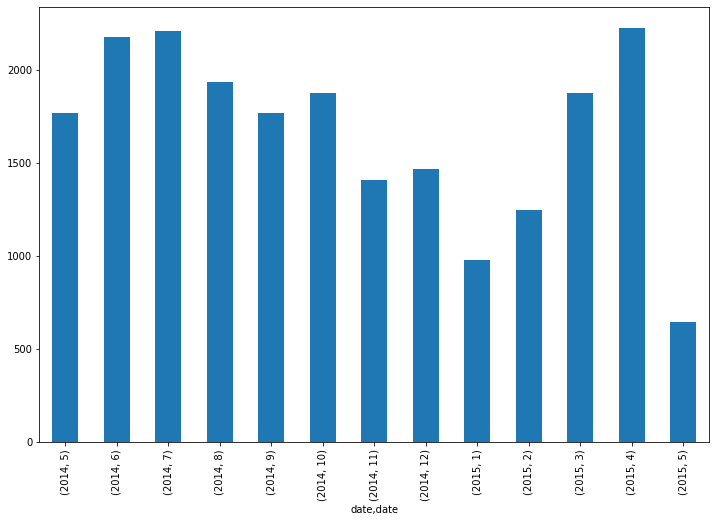

In [27]:
df_viz.date.groupby([df_viz.date.dt.year, df_viz.date.dt.month]).count().plot(kind='bar',figsize=(12,8));
     # This line inspired by the helpful folks at https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

### Feature Transformation

Before manipulating every column, we should clarify which features should be distributed normally.
Lets organize a little. The features whose distributions should be normal are the numeric data. We can omit the following from numeric:
* ID - not predictive
* Price - target
* Date - datetime object
* Lat and Long - often combined to calculate a distance but almost never a linear impact on target
* Waterfront - a boolean 0 or 1
* Zipcode - a categorical region

In [45]:
numeric = list(df_viz.drop(['id', 'price', 'log_price', 'date', 'lat', 'long', 'waterfront', 'zipcode'], axis=1).columns)
numeric

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

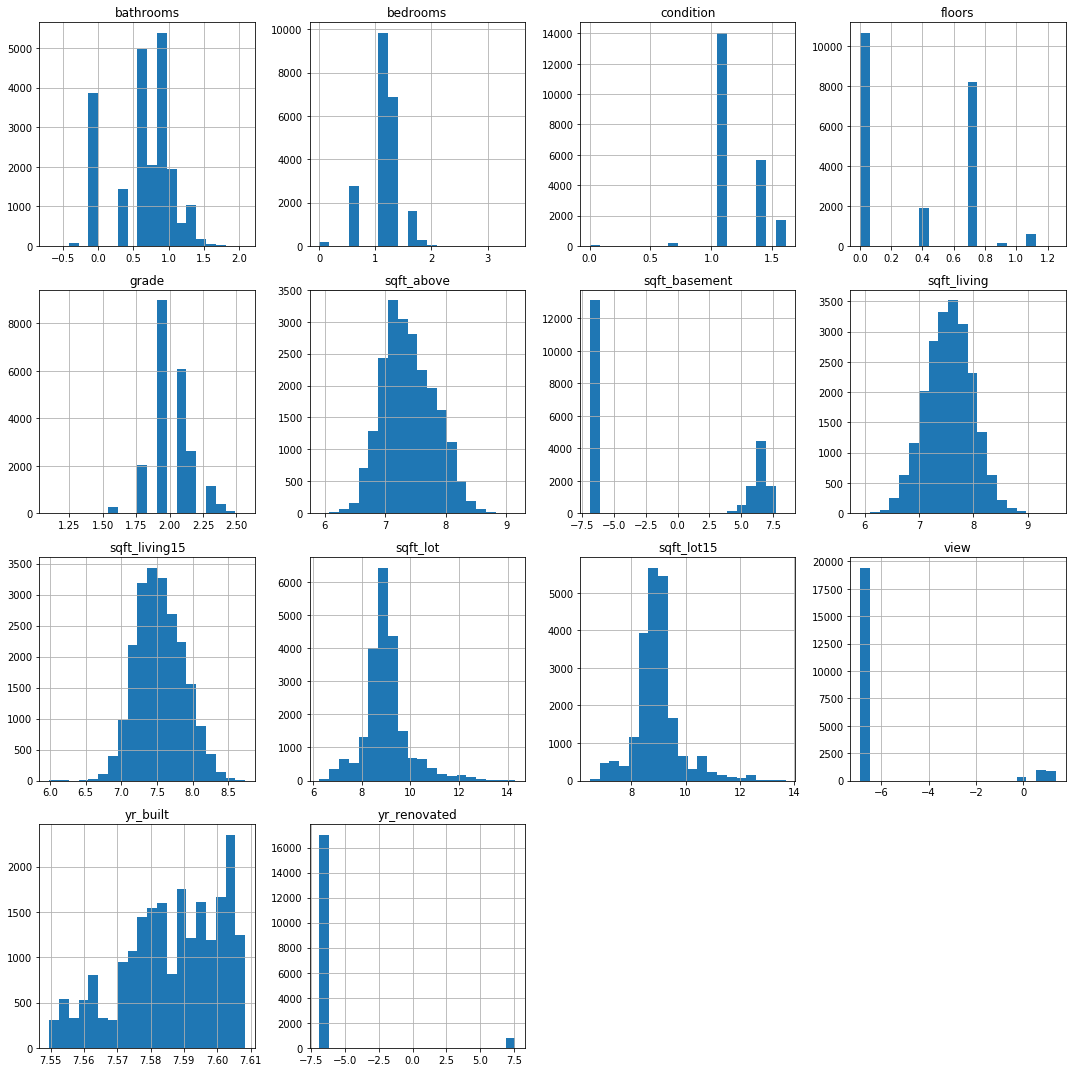

In [46]:
np.log(df_viz[numeric].applymap(lambda x: float(x)) + 0.001).hist(figsize=(15,15), bins=20)
plt.tight_layout();

That looks much more normal for the sqft features as well as bathrooms, bedrooms and grade.

## Check for Collinearity

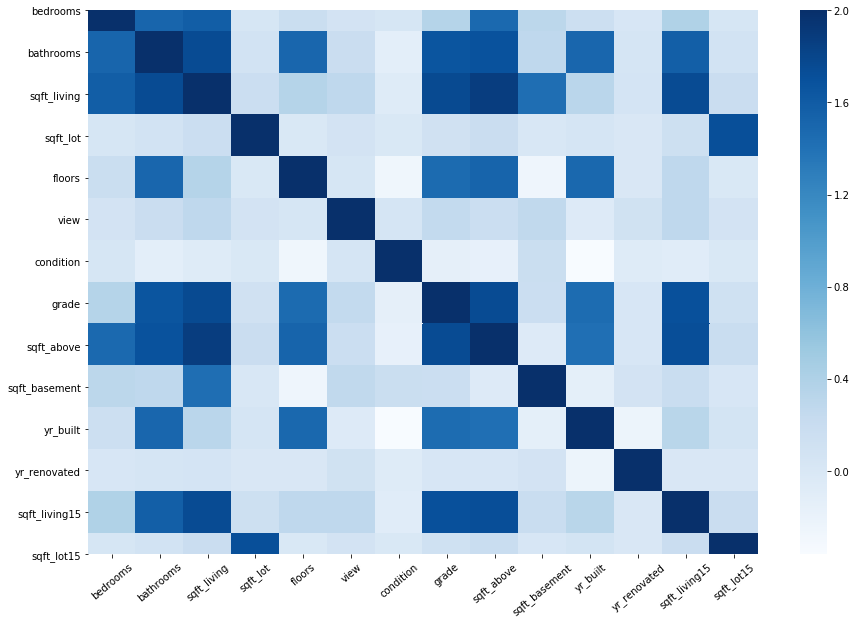

In [52]:
cutoff = 0.4
hmap = df_viz[numeric].corr() + (df_viz[numeric].corr() > cutoff)
plt.figure(figsize=(15,10))
sns.heatmap(hmap, cmap="Blues")
plt.xticks(rotation=40);

The rows with the most dark blue in it are bathrooms, sqft_living, and sqft_above. 
These seem to be collinear with grade and sqft_living15. 

## Target Correlation
How correlated are the features to the price of a home?

In [48]:
round(df_viz.corr()[targets],3)

,price,log_price
id,-0.017,-0.004
price,1.000,0.892
bedrooms,0.309,0.343
bathrooms,0.526,0.551
sqft_living,0.702,0.695
sqft_lot,0.090,0.100
floors,0.257,0.311
waterfront,0.276,0.181
view,0.396,0.345
condition,0.036,0.039


Logging the price seems to have a generally positive affect on correlation.  
The strong contenders seem to be batr

What about the logged numeric features correlation with price and log price?

In [49]:
log_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

In [50]:
round(
    np.log(
    df_viz[log_features + targets] + 0.0001
    ).corr()[targets], 
    3
)

,price,log_price
bedrooms,0.343,0.343
bathrooms,0.520,0.521
sqft_living,0.675,0.674
sqft_lot,0.138,0.135
grade,0.694,0.692
sqft_above,0.586,0.584
sqft_basement,0.223,0.223
sqft_living15,0.607,0.606
sqft_lot15,0.124,0.120
price,1.000,1.000


Not a massive improvement. Visualizations will give a better idea.

### Visualize Correlation With Scatter Plots

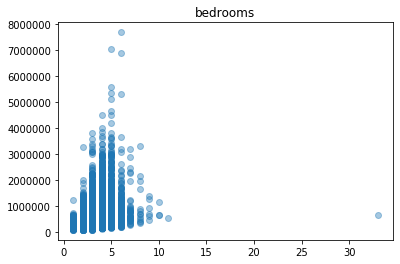

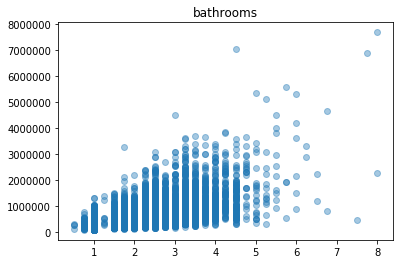

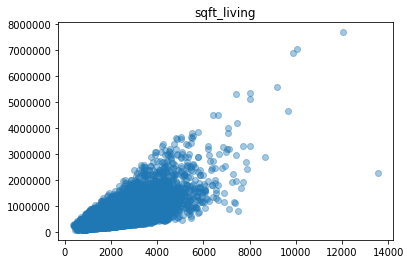

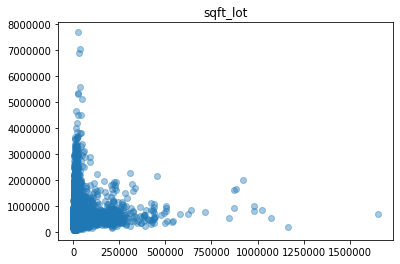

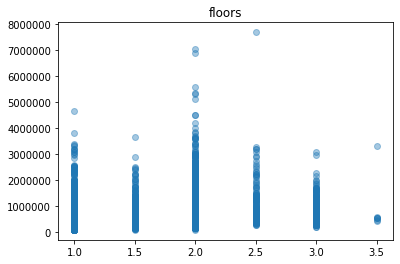

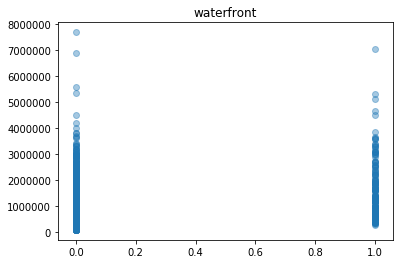

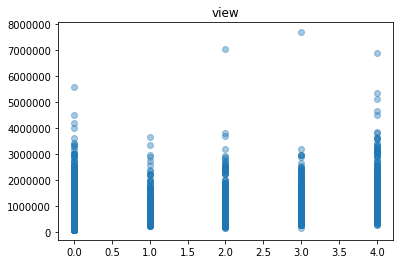

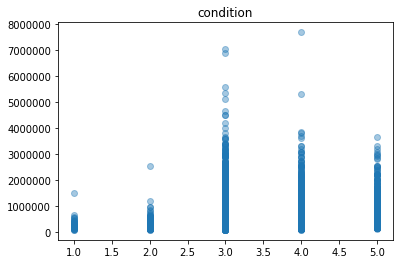

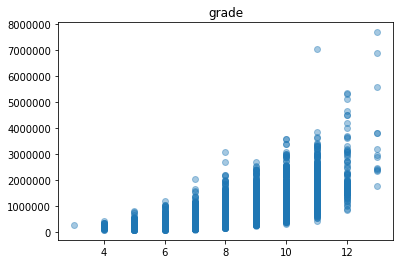

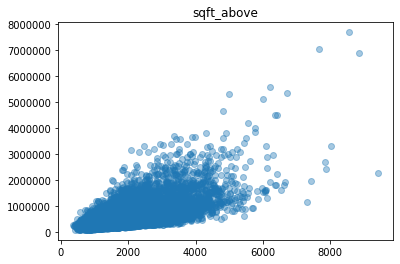

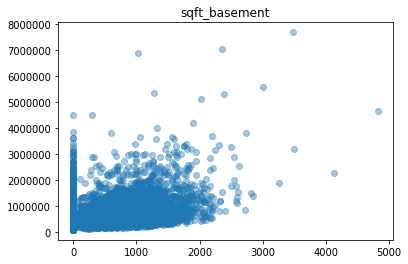

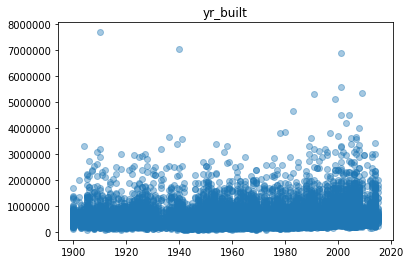

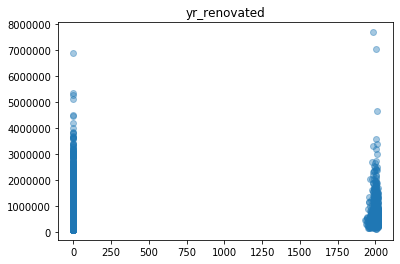

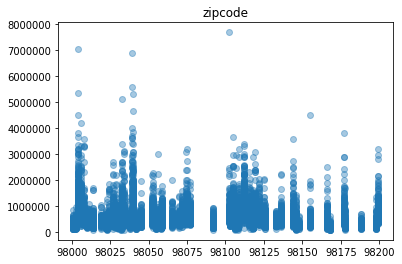

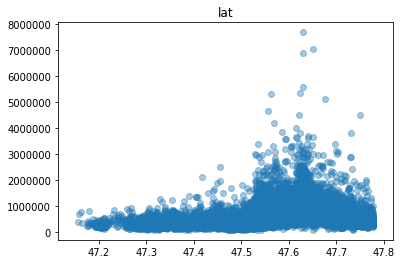

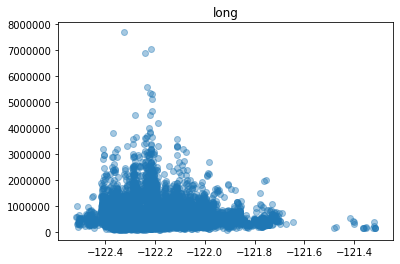

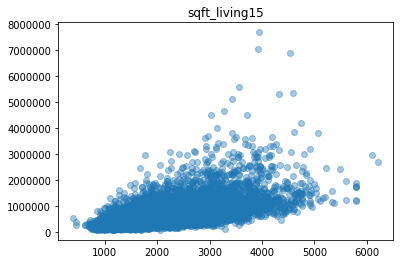

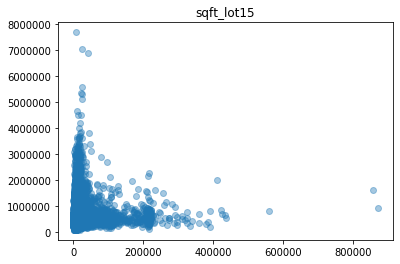

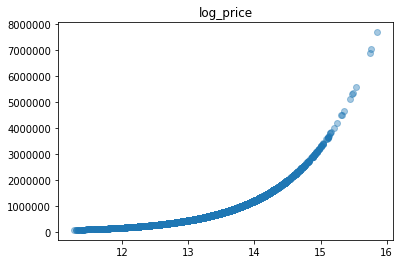

In [53]:
for col in df_viz.drop(['id', 'price', 'date'], axis=1).columns:
    plt.scatter(df_viz[col], df_viz.price, alpha=0.4)
    plt.title(col)
    plt.show()

# Data Preparation

* Coerce any dtypes to proper format
* Normalize numerical
* Remove, or fill missing data
* One Hot Encode Categorical Data

# Modeling

# Evaluation

https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/

# Deployment

Putting in a script.py and running it